In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/data_gibran.csv", index_col=0)
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Dec 25 11:29:06 +0000 2023,1739246886425694408,"Gibran bikin Solo eksis, Cak Imin mungkin masi...",0,0,0,0,in,1678809428504743938,1739246886425694408,jaenabeti261330,https://twitter.com/jaenabeti261330/status/173...
1,Mon Dec 25 11:29:02 +0000 2023,1739246873620389900,"Gibran berhasil bikin Solo eksis, Cak Imin mun...",0,0,0,0,in,1678681664615227392,1739246873620389900,AsepSusant,https://twitter.com/AsepSusant/status/17392468...
2,Mon Dec 25 11:28:59 +0000 2023,1739246860181897634,"Gibran bikin Solo jadi pusat perhatian, Cak Im...",0,0,0,0,in,1678338299054919680,1739246860181897634,nawang_nugroho,https://twitter.com/nawang_nugroho/status/1739...
3,Mon Dec 25 11:28:57 +0000 2023,1739246851415740469,"@VIVAcoid Urang Jabar, naha ikhlas disebut keu...",0,0,0,0,in,1493831656469409796,1739234052711047409,h68052,https://twitter.com/h68052/status/173924685141...
4,Mon Dec 25 11:28:57 +0000 2023,1739246851168284898,"Gibran gesit, Cak Imin agak lambat Kira-kira h...",0,0,0,0,in,1673581261791854594,1739246851168284898,elisuwarsih,https://twitter.com/elisuwarsih/status/1739246...
...,...,...,...,...,...,...,...,...,...,...,...,...
363,Mon Dec 25 11:06:24 +0000 2023,1739241176497267013,@VIVAcoid lahhh katanya silahkan cek di gugel ...,0,0,0,0,in,1640312632031985666,1739203845719515410,zidnsptra,https://twitter.com/zidnsptra/status/173924117...
364,Mon Dec 25 11:06:23 +0000 2023,1739241170121929179,@Dimasjoko12 @bentangnegeri @gibran Yang penti...,0,2,0,0,in,1534200395009904640,1738452737879376073,Gr4sssss,https://twitter.com/Gr4sssss/status/1739241170...
365,Mon Dec 25 11:05:49 +0000 2023,1739241029432418730,Solo membuktikan bahwa Prabowo - Gibran punya ...,0,0,0,0,in,1678709385529524224,1739241029432418730,soemardihasan,https://twitter.com/soemardihasan/status/17392...
366,Mon Dec 25 11:05:46 +0000 2023,1739241015922610469,@janganlupasans @racunsay @gibran_tweet tapi f...,0,0,0,0,in,4046649492,1738915961129029791,nilrofficial,https://twitter.com/nilrofficial/status/173924...


In [ ]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,"Gibran bikin Solo eksis, Cak Imin mungkin masi...",jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,"Gibran berhasil bikin Solo eksis, Cak Imin mun...",AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,"Gibran bikin Solo jadi pusat perhatian, Cak Im...",nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,"@VIVAcoid Urang Jabar, naha ikhlas disebut keu...",h68052,Mon Dec 25 11:28:57 +0000 2023
4,"Gibran gesit, Cak Imin agak lambat Kira-kira h...",elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,@VIVAcoid lahhh katanya silahkan cek di gugel ...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,@Dimasjoko12 @bentangnegeri @gibran Yang penti...,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,Solo membuktikan bahwa Prabowo - Gibran punya ...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,@janganlupasans @racunsay @gibran_tweet tapi f...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


# 1. Cleaning Data

In [ ]:
df.shape

(368, 3)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [ ]:
df.shape

(368, 3)

In [ ]:
def clean_twitter_text(text):
    # Menghapus karakter khusus seperti @mentions, #hashtags, dan URL
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin masih...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin agak lambat kirakira har...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,lahhh katanya silahkan cek di gugel udah banya...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,yang penting bukan petugas partai apalagi bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan bahwa prabowo gibran punya re...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,tapi fans nya yg muslim pada gaterima beliau d...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


# 2. Preprocessing

### 2.1 Normalisasi

In [ ]:
norm = {' gugel ':' google ', ' yg ':' yang ', " spt " : " seperti ", 'lahhh':' ', ' gt ':' gitu ', ' skrg ':' sekarang ', ' cth ':' contoh ', ' aniesmuhaimin ':' anies muhaimin ', ' prabowogibran ':' prabowo gibran ',' gak ':' tidak ' ,' bangetdari ':' banget dari ','vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' ganjarmahfud ':' ganjar mahfud ', ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak ',
 ' ganjar ':' ', ' mahfud ':' ', 'ganjarmahfud':' ', ' ganjarmahfud ':' ', 'aniesmuhaimin ':' ', ' muhaimin ':' ', ' anies ':' ', ' prabowo ':' ', ' ganjar ':' '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin masih...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin agak lambat kirakira har...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,katanya silahkan cek di google udah banyak s...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,yang penting bukan petugas partai apalagi bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan bahwa gibran punya rencana ek...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,tapi fans nya yang muslim pada gaterima beliau...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


### 2.2 Stopword

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin menca...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin lambat kirakira harusnya...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,katanya silahkan cek google udah banyak swas...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,penting bukan petugas partai bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan gibran punya rencana ekonomi ...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,fans nya muslim gaterima beliau dibaptis jadi ...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


### 2.3 Tokenize

In [ ]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [gibran, bikin, solo, eksis, cak, imin, mungki...
1      [gibran, berhasil, bikin, solo, eksis, cak, im...
2      [gibran, bikin, solo, jadi, pusat, perhatian, ...
3      [urang, jabar, naha, ikhlas, disebut, keun, ba...
4      [gibran, gesit, cak, imin, lambat, kirakira, h...
                             ...                        
363    [katanya, silahkan, cek, google, udah, banyak,...
364           [penting, bukan, petugas, partai, bokeper]
365    [solo, membuktikan, gibran, punya, rencana, ek...
366    [fans, nya, muslim, gaterima, beliau, dibaptis...
367    [solo, sukses, bawah, gibran, bukti, perubahan...
Name: full_text, Length: 368, dtype: object

### 2.4 Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv("/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid2/hasil_preprocessing/dataPreprocessingGibran.csv", index=False)

gibran bikin solo eks cak imin mungkin cari panggung politik pas
gibran hasil bikin solo eks cak imin mungkin ajar cara tampil layar politik
gibran bikin solo jadi pusat perhati cak imin nampaknya sibuk nyari kipas angin dunia politik
urang jabar naha ikhlas sebut keun bakal ngadukung gibran ulah poho 2019 dibobodo prabowo
gibran gesit cak imin lambat kirakira harus gimana nih
ekonomi solo roket terima kasih gibran jakarta jateng maksimal bawah muhaimin
gibran bikin solo kini cak imin mungkin sibuk cari tempat duduk nyaman arena politik
gibran bikin solo gemilang bikin geming
gibran paham cak imin kayak butuh kelas ekonomi
gibran bikin solo eks cak imin mungkin sibuk cari stasiun politik naik tangga sukses
pingin liat gibran debatin si den wadas wan ngibul
gibran efisien cak imin mungkin perlu ajar manajemen waktu


KeyboardInterrupt: ignored

# 3. Terjemahan

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid2/hasil_preprocessing/dataPreprocessingGibran.csv', index_col=0)
data

,full_text
0,gibran bikin solo eks cak imin mungkin cari pa...
1,gibran hasil bikin solo eks cak imin mungkin a...
2,gibran bikin solo jadi pusat perhati cak imin ...
3,urang jabar naha ikhlas sebut keun bakal ngadu...
4,gibran gesit cak imin lambat kirakira harus gi...
...,...
345,makasih udah wakil pen banget ngomong goblok t...
346,nyata beda jauh sama bapak bagaiman jadi indon...
347,tentang mas gibran sanggup jawab segala ragu p...
348,ngeles dr pertama gibran sdh langgar sdh ingat...


In [ ]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid2/hasil_terjemahan/dataTerjemahanGibran.csv")

KeyboardInterrupt: ignored

# 4. Labeling

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab /Youtube/SENTIMENT ANALYSIS/Vid2/hasil_terjemahan/dataTerjemahanMahfud.csv", index_col=0)
data

,full_text,tweet_english
0,duh mahfud md nyata pernah langgar etika jadi ...,duh mahfud md has actually violated the ethics...
1,kikidaliyo pranowo pimpin rangkul semua pandan...,kikidaliyo pranowo lead embrace all views trib...
2,brarti usaha swasta tsb baru nyata minat aja d...,brarti private business new real interest just...
3,ganjar mahfud gubernur sukses kini siap bawa a...,eagle mahfud the successful governor is now re...
4,arsjadrasjid mohmahfudmd cuma pak mahfud begin...,arsjadrasjid mohmahfudmd just sir mahfud begin...
...,...,...
341,pimpin jujur bawa angin segar dunia politik se...,lead honestly bring a fresh breeze the politic...
342,ganjar mahfud libat urus didik bawa maju sektor,egregious mahfud involvement in the governance...
343,ganjar pranowo emang karya anak bangsa gaada g...,eagerness pranowo emang work of the nation's c...
344,hasil mahfud gubernur prestasi luar biasa patu...,the results of the governor's mahfud extraordi...


In [ ]:
data = data.head(275)
data

,full_text,tweet_english
0,duh mahfud md nyata pernah langgar etika jadi ...,duh mahfud md has actually violated the ethics...
1,kikidaliyo pranowo pimpin rangkul semua pandan...,kikidaliyo pranowo lead embrace all views trib...
2,brarti usaha swasta tsb baru nyata minat aja d...,brarti private business new real interest just...
3,ganjar mahfud gubernur sukses kini siap bawa a...,eagle mahfud the successful governor is now re...
4,arsjadrasjid mohmahfudmd cuma pak mahfud begin...,arsjadrasjid mohmahfudmd just sir mahfud begin...
...,...,...
270,ganjar mahfud calon presiden harap beri solusi...,"said Mahfud, the presidential candidate, pleas..."
271,21 program unggul poin 1121 tsunami aceh lukas...,21 points superior program 1121 tsunami aceh l...
272,ganjar mahfud rekam jejak bersih jadi harap ba...,eagle mahfud clean track record so hopefully n...
273,warga jatim percaya mahfud bawa semangat baru ...,east Java residents believe mahfud brings a ne...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 194
Netral = 67
Negatif = 14

Total Data : 275


In [ ]:
data['klasifikasi'] = status
data

<ipython-input-19-7770f1968a96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['klasifikasi'] = status


,full_text,tweet_english,klasifikasi
0,duh mahfud md nyata pernah langgar etika jadi ...,duh mahfud md has actually violated the ethics...,Negatif
1,kikidaliyo pranowo pimpin rangkul semua pandan...,kikidaliyo pranowo lead embrace all views trib...,Positif
2,brarti usaha swasta tsb baru nyata minat aja d...,brarti private business new real interest just...,Positif
3,ganjar mahfud gubernur sukses kini siap bawa a...,eagle mahfud the successful governor is now re...,Positif
4,arsjadrasjid mohmahfudmd cuma pak mahfud begin...,arsjadrasjid mohmahfudmd just sir mahfud begin...,Positif
...,...,...,...
270,ganjar mahfud calon presiden harap beri solusi...,"said Mahfud, the presidential candidate, pleas...",Netral
271,21 program unggul poin 1121 tsunami aceh lukas...,21 points superior program 1121 tsunami aceh l...,Positif
272,ganjar mahfud rekam jejak bersih jadi harap ba...,eagle mahfud clean track record so hopefully n...,Positif
273,warga jatim percaya mahfud bawa semangat baru ...,east Java residents believe mahfud brings a ne...,Positif


# 5. Visualisasi

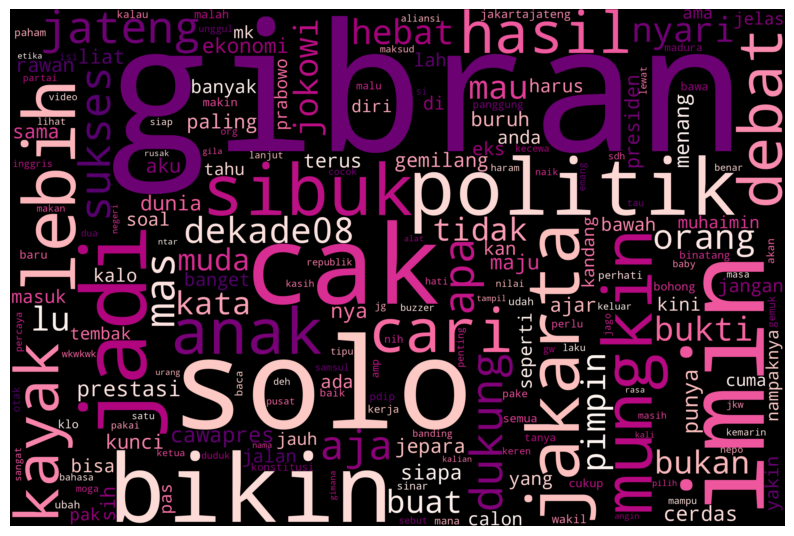

In [ ]:
from wordcloud import WordCloud, STOPWORDS


def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='RdPu',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

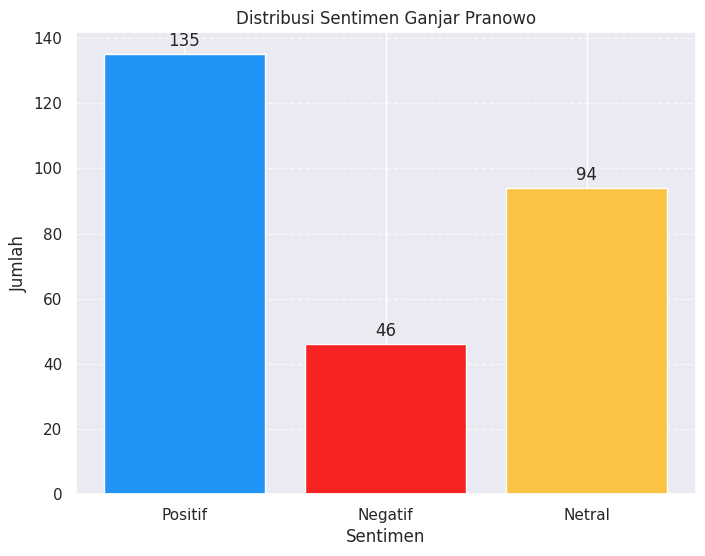

In [ ]:
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")

# 6. Klasifikasi Naive Bayes

In [ ]:
data

,full_text,tweet_english,klasifikasi
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif
1,dibilangin benar gibran samsul android bukan m...,said to be true gibran samsul android is not a...,Negatif
2,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral
3,ijin tamu,guest permissions,Netral
4,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral
...,...,...,...
270,gibran bikin solo sinar jakartajateng cuma bik...,gibran make solo ray jakartajateng just make d...,Negatif
271,bahagia udah kandang ama gibran gemuk wkakakka...,happy already ama cage fat gibran wkakakka wat...,Positif
272,berita ter fresh seram ngeri sedap bisa dibang...,ter news fresh horror horrifyingly delicious c...,Positif
273,gibran sukses sukses bikin bingung,gibran success success to confuse,Positif


In [ ]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test :', cl.accuracy(dataset))

Akurasi Test : 0.8036363636363636


In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 233
Netral = 40
Negatif = 2

Total Data : 275


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

<ipython-input-35-59ffdbe4098c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['klasifikasi_bayes'] = status


In [ ]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif,Positif
1,dibilangin benar gibran samsul android bukan m...,said to be true gibran samsul android is not a...,Negatif,Positif
2,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral,Netral
3,ijin tamu,guest permissions,Netral,Netral
4,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral,Positif
...,...,...,...,...
270,gibran bikin solo sinar jakartajateng cuma bik...,gibran make solo ray jakartajateng just make d...,Negatif,Netral
271,bahagia udah kandang ama gibran gemuk wkakakka...,happy already ama cage fat gibran wkakakka wat...,Positif,Positif
272,berita ter fresh seram ngeri sedap bisa dibang...,ter news fresh horror horrifyingly delicious c...,Positif,Netral
273,gibran sukses sukses bikin bingung,gibran success success to confuse,Positif,Positif


In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
    else:
        print("Tuple tidak memiliki cukup elemen.")

Text: dibilangin benar gibran samsul android bukan manusia bu dokteritu alat acak otak jadi buat orang liat otak gesrek gila efek samping tanpa henti maki orang lebih bahaya hati lama2 busuk efek lanjut
Classifier: Negatif
Classifier Bayes: Positif 

Text: gibran bikin solo jadi pusat perhati cak imin nampaknya sibuk nyari kipas angin dunia politik
Classifier: Netral
Classifier Bayes: Positif 

Text: bukan reprentasi anak muda layak prestasi bagai tokoh anak muda ajar tabrak konstitusi menciptaka sejarah buruk negeri yang di tiru generasi berikutx
Classifier: Negatif
Classifier Bayes: Positif 

Text: gibran gesit cak imin lambat kirakira harus gimana nih
Classifier: Negatif
Classifier Bayes: Netral 

Text: gibran bikin solo gemilang bikin geming
Classifier: Netral
Classifier Bayes: Positif 

Text: coba jelas
Classifier: Positif
Classifier Bayes: Netral 

Text: pingin liat gibran debatin si den wadas wan ngibul
Classifier: Negatif
Classifier Bayes: Netral 

Text: gibran efisien cak imin

# 7. Testing

In [ ]:
def classify_text(text, cl):
    analysis = TextBlob(text, classifier=cl)
    return analysis.classify()

data_tweet = list(data['tweet_english'])
polaritas = 0

input_text = input('\nMasukkan teks yang ingin diuji: ')
hasil_klasifikasi = classify_text(input_text, cl)

print(f'\nHasil Klasifikasi untuk Teks yang Dimasukkan: {hasil_klasifikasi}')


Masukkan teks yang ingin diuji: pilih pemimpin yang bertanggung jawab

Hasil Klasifikasi untuk Teks yang Dimasukkan: Netral
